In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

In [22]:
data = pd.read_csv("ML_data.csv")
data.head()

,date,day,tempSkin,dailyrmssd,deeprmssd,restingHeartRate,breathingRate,spo2avg
0,2021-09-30,25,1.5,80.894,76.424,57,15.4,94.6
1,2021-10-03,28,0.1,57.908,46.137,58,14.2,94.4
2,2021-10-04,29,0.5,65.453,58.184,58,15.0,95.1
3,2021-10-06,31,0.7,57.619,50.259,58,15.6,95.9
4,2021-10-07,32,-0.5,64.212,53.507,58,15.2,93.8


In [23]:
columns = data.columns
print(columns)

Index(['date', 'day', 'tempSkin', 'dailyrmssd', 'deeprmssd',
       'restingHeartRate', 'breathingRate', 'spo2avg'],
      dtype='object')


In [75]:
train_size = int(len(data) * 0.7)
train, test = data[:train_size], data[train_size:]

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train[['tempSkin', 'dailyrmssd', 'deeprmssd', 'restingHeartRate', 'breathingRate', 'spo2avg']])
scaled_test = scaler.transform(test[['tempSkin', 'dailyrmssd', 'deeprmssd','restingHeartRate', 'breathingRate', 'spo2avg']])

model = RandomForestRegressor()
model.fit(scaled_train,train['day'])

y_pred = model.predict(scaled_test)

mae = mean_absolute_error(test['day'], y_pred)
mse = mean_squared_error(test['day'], y_pred)
r2 = r2_score(test['day'], y_pred)
accuracy = accuracy_score(test['day'],y_pred.round())

print(mae,mse,r2,accuracy)

8.09457894736842 99.33449315789474 0.2640687382200929 0.010526315789473684


In [76]:
model.feature_importances_

array([0.14072135, 0.31671247, 0.16369656, 0.15402921, 0.10779219,
       0.11704822])

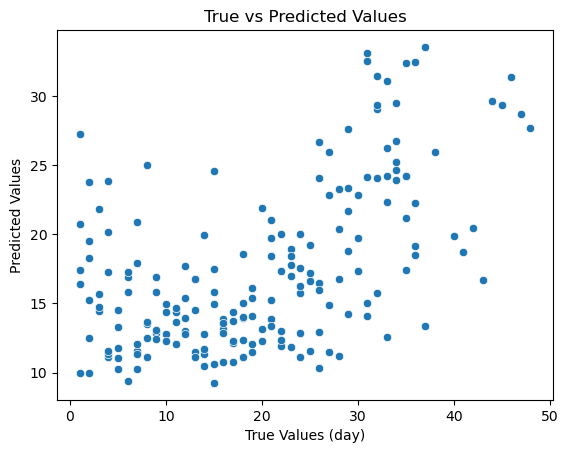

In [77]:
sns.scatterplot(x=test['day'],y=y_pred)
plt.xlabel('True Values (day)')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [89]:
train_size = int(len(data) * 0.7)
train, test = data[:train_size], data[train_size:]

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train[['tempSkin', 'dailyrmssd', 'deeprmssd', 'restingHeartRate', 'breathingRate', 'spo2avg']])
scaled_test = scaler.transform(test[['tempSkin', 'dailyrmssd', 'deeprmssd','restingHeartRate', 'breathingRate', 'spo2avg']])

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(scaled_train, train['day'])

y_pred = knn_model.predict(scaled_test)


mae = mean_absolute_error(test['day'], y_pred)
mse = mean_squared_error(test['day'], y_pred)
r2 = r2_score(test['day'], y_pred)
accuracy = accuracy_score(test['day'],y_pred.round())

print(mae,mse,r2,accuracy)

8.406315789473684 112.19663157894738 0.16877807476095408 0.03684210526315789


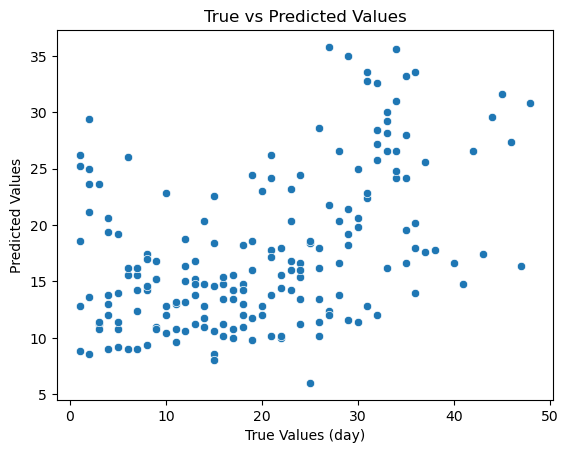

In [90]:
sns.scatterplot(x=test['day'],y=y_pred)
plt.xlabel('True Values (day)')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()